# Project description

> In this project we are going to attempt to accurately predict stock market prices on the long run.

> We will use the following 8 major technology companies' stock market data as the learning dataset:

 Company | Stock symbol
 --- | ---
  Amazon | AMZN
 AMD | AMD
 Apple | AAPL
 Facebook | FG
 Google | GOOGL
 Intel | INTC
 Microsoft | MSFT
 NVIDIA | NVDA

# Stock market datasets

> These are the links to the datasets that we used:

>* [Huge Stock Market Dataset](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs)

>* [Google, Amazon, Facebook, Aapple stock prices](https://www.kaggle.com/stexo92/gafa-stock-prices)

>* [New York Stock Exchange Database](https://www.kaggle.com/dgawlik/nyse)

# Colab environment setup

> Since we are going to use mainly Kaggle datasets, we have to use the Kaggle API if we don't want to manually download them from **Kaggle**, and upload them to **Google Colab**.  Fortunatelly Kaggle has a package for this purpose. Google Colab comes with various pre-installed python packages, but not with this one, so our first step is installing it.

>Next, we can import it as well as all other python package we are planning to use.

> After importing the Kaggle package, we can upload the API key to colab. The Kaggle API client expects this file to be in ~/.kaggle, so we move it there, and we can start to download our datasets.

In [1]:
# Install packages
!pip install kaggle

    100% |████████████████████████████████| 61kB 4.0MB/s 
    100% |████████████████████████████████| 235kB 7.8MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
# Import dependecies

# Provides a portable way of using operating system dependent functionality
import os
# Provides regular expression matching operations
import re
# Provides various time-related functions
import time
# Supplies classes for manipulating dates and times
from datetime import datetime
# Represents filesystem paths
from pathlib import Path

# Fundamental package for scientific computing
import numpy as np
# Python Data Analysis Library
import pandas as pd
# Calculates a Pearson correlation coefficient for testing non-correlation.
from scipy.stats import pearsonr
# Transforms features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
# Data visualization tool
import matplotlib.pyplot as plt
%matplotlib inline
# Data visualization tool
import seaborn as sns
sns.set()

In [3]:
# Upload kaggle API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zsombroo","key":"beca56f668daa240c2006abd50578bee"}'}

In [4]:
# Ensure it is there
!ls -lha kaggle.json

# The Kaggle API client expects this file to be in ~/.kaggle, so lets move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 64 Oct 14 21:05 kaggle.json


# Data acquisition and preparation

> To get the desired training, validating and testing sets in a homogeneous format, we have to filter the datasets for data belonging to the choosen companies, and merge them into one dictionary of datasets. This breaks down to the following steps:

> 1\. We download, unzip, move the files to their desired destination.

> 2\. Then we load the data into pandas DataFrames, and create the dictionary for the final datasets.

> 3\. We filter each one of them for the choosen companies and append the records to the final datasets.

> 4\. We merged the companies' data to lenghten the timespan where we have records.

In [5]:
# Download stock market prices datasets
!kaggle datasets download -d dgawlik/nyse
!kaggle datasets download -d stexo92/gafa-stock-prices
!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs

# Download news datasets
!kaggle datasets download -d aaron7sun/stocknews
!kaggle datasets download -d snapcrack/all-the-news
!kaggle datasets download -d census/business-and-industry-reports
!kaggle datasets download -d therohk/million-headlines
!kaggle datasets download -d census/total-business-inventories-and-sales-data

!wget http://cache.getdata.io/n4722_fe1122d666811ef721fdcb4137c664b1eses/1539302400_all.csv

 15% 5.00M/32.8M [00:00<00:01, 27.6MB/s]
100% 32.8M/32.8M [00:00<00:00, 120MB/s] 
  0% 0.00/398k [00:00<?, ?B/s]
100% 398k/398k [00:00<00:00, 78.8MB/s]
 97% 237M/245M [00:01<00:00, 221MB/s]
100% 245M/245M [00:01<00:00, 240MB/s]
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 174MB/s]
 94% 238M/253M [00:02<00:00, 103MB/s]
100% 253M/253M [00:02<00:00, 104MB/s]
 75% 5.00M/6.66M [00:00<00:00, 36.3MB/s]
100% 6.66M/6.66M [00:00<00:00, 46.2MB/s]
 27% 5.00M/18.6M [00:00<00:00, 27.6MB/s]
100% 18.6M/18.6M [00:00<00:00, 68.0MB/s]
  0% 0.00/7.02k [00:00<?, ?B/s]
100% 7.02k/7.02k [00:00<00:00, 4.30MB/s]
--2018-10-14 21:05:45--  http://cache.getdata.io/n4722_fe1122d666811ef721fdcb4137c664b1eses/1539302400_all.csv
Resolving cache.getdata.io (cache.getdata.io)... 54.231.49.107
Connecting to cache.getdata.io (cache.getdata.io)|54.231.49.107|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11850 (12K) [application/csv]
Saving to: ‘1539302400_all.csv’

1539302400_al

In [6]:
# Check downloads
!ls

1539302400_all.csv
all-the-news.zip
business-and-industry-reports.zip
gafa-stock-prices.zip
kaggle.json
million-headlines.zip
nyse.zip
price-volume-data-for-all-us-stocks-etfs.zip
sample_data
stocknews.zip
total-business-inventories-and-sales-data.zip


In [7]:
# Creating directory hierarchy
!mkdir data
!mkdir data/news
!mkdir data/stocks
!mkdir data/stock_exchange
!mkdir data/sales_data
# Unzipping the downloaded files and moving them into the respective directories
!unzip stocknews.zip -d data/news
!unzip price-volume-data-for-all-us-stocks-etfs.zip -d data/stocks
!unzip data/stocks/Data.zip -d data/stocks
!unzip all-the-news.zip -d data/news
!unzip business-and-industry-reports.zip -d data/news
!unzip gafa-stock-prices.zip -d data/stocks
!unzip million-headlines.zip -d data/news
!unzip nyse.zip -d data/stock_exchange
!unzip stock-price.zip -d data/stocks
!unzip total-business-inventories-and-sales-data.zip -d data/sales_data
# Removing excess files
!rm stocknews.zip
!rm price-volume-data-for-all-us-stocks-etfs.zip
!rm all-the-news.zip
!rm business-and-industry-reports.zip
!rm gafa-stock-prices.zip
!rm million-headlines.zip
!rm nyse.zip
!rm stock-price.zip
!rm total-business-inventories-and-sales-data.zip

Archive:  stocknews.zip
  inflating: data/news/Combined_News_DJIA.csv  
  inflating: data/news/DJIA_table.csv  
  inflating: data/news/RedditNews.csv  
Archive:  price-volume-data-for-all-us-stocks-etfs.zip
  inflating: data/stocks/Data.zip    
Archive:  data/stocks/Data.zip
  inflating: data/stocks/ETFs/aadr.us.txt  
  inflating: data/stocks/ETFs/aaxj.us.txt  
  inflating: data/stocks/ETFs/acim.us.txt  
  inflating: data/stocks/ETFs/actx.us.txt  
  inflating: data/stocks/ETFs/acwf.us.txt  
  inflating: data/stocks/ETFs/acwi.us.txt  
  inflating: data/stocks/ETFs/acwv.us.txt  
  inflating: data/stocks/ETFs/acwx.us.txt  
  inflating: data/stocks/ETFs/adra.us.txt  
  inflating: data/stocks/ETFs/adrd.us.txt  
  inflating: data/stocks/ETFs/adre.us.txt  
  inflating: data/stocks/ETFs/adru.us.txt  
  inflating: data/stocks/ETFs/afk.us.txt  
  inflating: data/stocks/ETFs/agf.us.txt  
  inflating: data/stocks/ETFs/agg.us.txt  
  inflating: data/stocks/ETFs/agnd.us.txt  
  inflating: data/stock

In [8]:
# Check files
!ls -R

.:
1539302400_all.csv  data  kaggle.json  sample_data

./data:
news  sales_data  stock_exchange  stocks

./data/news:
abcnews-date-text.csv  articles3.csv	       DJIA_table.csv  RedditNews.csv
articles1.csv	       Combined_News_DJIA.csv  metadata.csv
articles2.csv	       data.csv		       notes.txt

./data/sales_data:
total-business-inventories_1.csv	    total-business-sales_2.csv
total-business-inventories_metadata_2.json  total-business-sales.csv

./data/stock_exchange:
fundamentals.csv  prices.csv  prices-split-adjusted.csv  securities.csv

./data/stocks:
 Data.zip   ETFs  'GAFA Stock Prices.csv'   Stocks

./data/stocks/ETFs:
aadr.us.txt  dwm.us.txt   ftls.us.txt  iwb.us.txt   pwc.us.txt	 syld.us.txt
aaxj.us.txt  dwx.us.txt   ftsd.us.txt  iwc.us.txt   pwv.us.txt	 syv.us.txt
acim.us.txt  dxd.us.txt   ftsl.us.txt  iwd.us.txt   pwz.us.txt	 szk.us.txt
actx.us.txt  dxge.us.txt  ftsm.us.txt  iwf.us.txt   pxe.us.txt	 tags.us.txt
acwf.us.txt  dxjc.us.txt  ftw.us.txt   iwl.us.txt   pxf.us.txt

In [9]:
# Get the files' names containing our target stocks' market prices
targets = ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN', 'INTC', 'NVDA', 'AMD']
stocks = []
for i in range(0,len(targets)):
  stocks.append(list(Path('./data/stocks/Stocks').rglob(targets[i].lower()+'.us.[tT][xX][tT]'))[0])
stocks.append(list(Path('./data/stocks').rglob('*.[cC][sS][Vv]'))[0])
stocks.append(list(Path('./data/stock_exchange').rglob('prices.[cC][sS][Vv]'))[0])

for s in stocks:
  print(s)

data/stocks/Stocks/aapl.us.txt
data/stocks/Stocks/msft.us.txt
data/stocks/Stocks/googl.us.txt
data/stocks/Stocks/fb.us.txt
data/stocks/Stocks/amzn.us.txt
data/stocks/Stocks/intc.us.txt
data/stocks/Stocks/nvda.us.txt
data/stocks/Stocks/amd.us.txt
data/stocks/GAFA Stock Prices.csv
data/stock_exchange/prices.csv


In [10]:
# Filter out corrupted files
failed_files = []
succeeded_files = []

for i in stocks:
  try:
    df = pd.read_csv(i, sep=',')
    succeeded_files.append(i)
  except Exception:
    failed_files.append(i)
    
print('Succeeded:', len(succeeded_files), 'Failed:', len(failed_files))

Succeeded: 10 Failed: 0


In [0]:
# Read stock prices data files
dfs = {}
for sf in succeeded_files:
  df = pd.read_csv(sf, sep=',')
  dfs[sf.as_posix()] = df

We are going to use these values:

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [12]:
# Printing out stock price data files for checking
for k, v in dfs.items():
  print(k, v.columns)

data/stocks/Stocks/aapl.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/msft.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/googl.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/fb.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/amzn.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/intc.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/nvda.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/Stocks/amd.us.txt Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
data/stocks/GAFA Stock Prices.csv Index(['Stock', 'Date', 'Open', 'High', 

'GAFA Stock Prices.csv' and 'prices.csv' contains multiple stocks' prices, so we have to filter them.

In [0]:
# Permanent storage of prepared datasets
stock_dict = {}

In [0]:
# Prepare GAFA Stock Prices.csv
gafa_df = dfs['data/stocks/GAFA Stock Prices.csv']
# The GAFA database refers to comanpies' stocks as the companies' names,
# we have to map the companies'names onto their stocks
co_to_stock_mapping = {
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Facebook': 'FB',
    'Google': 'GOOGL'
}
# Convert string date to unix timestamp
gafa_new = list(
    map(
        lambda x:
        [
            x[0],  # Stock
            datetime.strptime(x[1], '%d/%m/%Y').timestamp(),  # Timestamp
            x[2],  # Open
            x[3],  # High
            x[4],  # Low
            x[5],  # Close
            x[7]  # Volume
        ],
        gafa_df.values
    )
)
gafa_dict = {}
# Create new dataframe
gafa_df = pd.DataFrame(gafa_new, columns=['Stock', 'Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
# Filter on stocks, columns and sort by timestamp
for stock in sorted(set(gafa_df.values[:, 0])):
  df = gafa_df.loc[gafa_df['Stock'] == stock]
  df = df[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']]
  df = df.sort_values(['Timestamp'])
  df = df.loc[df['Timestamp'] <= 1510272000.0]
  df = df.dropna()
  df = df.reset_index(drop=True)
  # Save our new dataframe to a dictionary
  gafa_dict[co_to_stock_mapping.get(stock)] = df

In [0]:
# Prepare prices.csv
prices_df = dfs['data/stock_exchange/prices.csv']
# 'cuz using only one format is too mainstream
def shitty_date_format_converter(x):
  for fmt in ('%Y-%m-%d', '%Y-%m-%d %H:%M:%S'):
    try:
      return datetime.strptime(x, fmt)
    except ValueError:
      pass
# Convert string date to unix timestamp
prices_new = list(
    map(
        lambda x:
        [
            x[1],  # Stock
            shitty_date_format_converter(x[0]).timestamp(),  # TimeStamp
            x[2],  # Open
            x[5],  # High
            x[4],  # Low
            x[3],  # Close
            x[6]  # Volume
        ],
        prices_df.values
    )
)
prices_dict = {}
# Create new dataframe
prices_df = pd.DataFrame(prices_new, columns=['Stock', 'Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
# Filter on stocks, columns and sort by timestamp
for stock in sorted(set(prices_df.values[:, 0]).intersection(set(targets))):
  df = prices_df.loc[prices_df['Stock'] == stock]
  df = df[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']]
  df = df.sort_values(['Timestamp'])
  df = df.loc[df['Timestamp'] <= 1510272000.0]
  df = df.dropna()
  df = df.reset_index(drop=True)
  # Save our new dataframe to a dictionary
  prices_dict[stock] = df

In [0]:
# Prepare single stock datasets

# Collect names of single stock files
txt_databases = []

for k in dfs.keys():
  if k.endswith('.us.txt'):
    txt_databases.append(k)

for f in txt_databases:
  df = dfs[f]
  # Convert string date to unix timestamp
  df_new = list(
      map(
          lambda x:
          [
              datetime.strptime(x[0], '%Y-%m-%d').timestamp(),  # Timestamp
              x[1],  # Open
              x[2],  # High
              x[3],  # Low
              x[4],  # Close
              x[5]  # Volume
          ],
          df.values
      )
  )
  df = pd.DataFrame(df_new, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])
  # Sort dataframe by timestamp
  df = df.sort_values(['Timestamp'])
  df = df.loc[df['Timestamp'] <= 1510272000.0]
  df = df.dropna()
  df = df.reset_index(drop=True)
  # Save our new dataframe to a dictionary
  stock_dict[f.split('/')[-1].split('.')[0].upper()] = df

In [17]:
# Merging dataframes
for k in stock_dict.keys():
  # Appending dataframes
  if k in gafa_dict.keys():
    stock_dict[k] = stock_dict[k].append(gafa_dict[k])
    print(k, 'was found in gafa_dict, and appended it to stock_dict[', k, ']')
  if k in prices_dict.keys():
    stock_dict[k] = stock_dict[k].append(prices_dict[k])
    print(k, 'was found in prices_dict, and appended it to stock_dict[', k, ']')
  # Droping duplicates
  stock_dict[k] = stock_dict[k].drop_duplicates('Timestamp')
  stock_dict[k] = stock_dict[k].sort_values(['Timestamp'])
  stock_dict[k] = stock_dict[k].reset_index(drop=True)

# Setting temp dicts to None to prevent accidental use
gafa_dict = None
prices_dict = None

AAPL was found in gafa_dict, and appended it to stock_dict[ AAPL ]
AAPL was found in prices_dict, and appended it to stock_dict[ AAPL ]
MSFT was found in prices_dict, and appended it to stock_dict[ MSFT ]
GOOGL was found in gafa_dict, and appended it to stock_dict[ GOOGL ]
GOOGL was found in prices_dict, and appended it to stock_dict[ GOOGL ]
FB was found in gafa_dict, and appended it to stock_dict[ FB ]
FB was found in prices_dict, and appended it to stock_dict[ FB ]
AMZN was found in gafa_dict, and appended it to stock_dict[ AMZN ]
AMZN was found in prices_dict, and appended it to stock_dict[ AMZN ]
INTC was found in prices_dict, and appended it to stock_dict[ INTC ]
NVDA was found in prices_dict, and appended it to stock_dict[ NVDA ]


# Visualization

> Before we start training the network and see the results, we want to take a look at the data at hand. We can do all sorts of interesting analysis with it, but here we will only make two types of diagrams.

> 1\. We draw a diagram where we can see the time intervals of all the companies. This provides us with an easy way to narrow down to the interception of the time frames.

> 2\. We make a heatmap of the Pearson correlation coefficients. This provides us with an insight to the relationships between the different companies's stock value. For this, we have to make a two-dimensional array that we fill up with the values from the Pearson correlaton coefficients. Then, we use the Seaborn library to draw the actual heatmap. 

> 3\. We want to take a look at the data itself in its purest form. We draw two diagrams for each company: one that shows us the gradual changing of the stocks's value, and one that show as the daily change in the value.

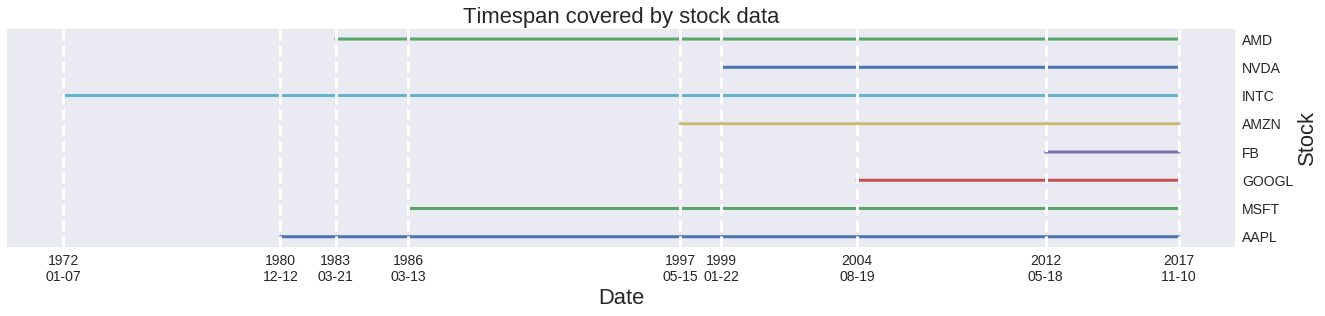

In [18]:
# Visualize the time span where we have data of stock prices
keys = stock_dict.keys()

# Creating custom x axis labels
start_at = []
ends_at = []
for k in keys:
  ts = stock_dict[k].values[0, 0]
  ts_end = stock_dict[k].values[-1, 0]
  start_at.append([ts, datetime.utcfromtimestamp(ts).strftime('%Y\n%m-%d')])
  ends_at.append([ts_end, datetime.utcfromtimestamp(ts_end).strftime('%Y\n%m-%d')])
  
start_at.append(sorted(ends_at)[0])
ts = [i[0] for i in sorted(start_at)]
st = [i[1] for i in sorted(start_at)]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(22, 4))
for k in keys:
  ax.plot(
      stock_dict[k]['Timestamp'].values, 
      [list(keys).index(k)] * len(stock_dict[k]['Open'].values), 
      label=k, 
      linewidth=3
  )

for t in ts:
  plt.axvline(x=t, color='w', linestyle='dashed', linewidth=3)
  
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

plt.xticks(ts, st, fontsize=14)
plt.xlabel('Date', fontsize=22)

plt.yticks([list(keys).index(k) for k in keys], keys, fontsize=14)
plt.ylabel('Stock', fontsize=22)

plt.title("Timespan covered by stock data", fontsize=22)
plt.grid()
plt.show()

In [0]:
# Function to make showing timestamps in a readable format easier
def convert_to_ticks(x, n=6, date_format='%Y-%m-%d'):
  step = int(len(x)/n)
  ticks_ts = []
  ticks_string = []
  for i in range(n):
    ts = x[i * step]
    ticks_ts.append(ts)
    ticks_string.append(datetime.utcfromtimestamp(ts).strftime(date_format))
  ticks_ts.append(x[-1])
  ticks_string.append(datetime.utcfromtimestamp(x[-1]).strftime(date_format))
  return ticks_ts, ticks_string

In [0]:
# Calculate Pearson correlation coefficients
stock_correlations = {}
list_of_names = list(stock_dict.keys())

for i1 in range(len(list_of_names)):
  for i2 in range(i1+1, len(list_of_names)):
    # We iterate through the companies in a way that all pairings only happen once
    key1 = list_of_names[i1]
    key2 = list_of_names[i2]
    dataframe1 = stock_dict[key1]
    dataframe2 = stock_dict[key2]
    # We calculate the time frame intersection between the data of the two companies
    ins = set(dataframe1.values[:, 0]).intersection(set(dataframe2.values[:, 0]))
    df1_kozos = dataframe1.loc[dataframe1['Timestamp'].isin(ins)]
    df2_kozos = dataframe2.loc[dataframe2['Timestamp'].isin(ins)]
    # We calculate and store the calculated results
    tmp = pearsonr(df1_kozos.values[:, 1], df2_kozos.values[:, 1])
    stock_correlations[(key1, key2)] = [tmp[0], tmp[1]]

In [0]:
# Preparing correlation data for seaborn heatmap
stock_table = np.full(shape=(8, 8), fill_value=np.NaN)
for i1 in range(len(list_of_names)):
  for i2 in range(i1+1, len(list_of_names)):
    key1 = list_of_names[i1]
    key2 = list_of_names[i2]
    stock_table[i1, i2] = stock_correlations[(key1, key2)][0]
# Create pandas dataframe from the correlation 2D array
df = pd.DataFrame(stock_table, index=list_of_names, columns=list_of_names)
# Seaborn heatmap requires the axes to be named
df = df.rename_axis('Stocks A')
df = df.rename_axis('Stocks B', axis="columns")
# First columns contains only NaN, so we can drop it
df = df.drop(df.columns[0], axis=1)
# Last row contains only NaN, so we can drop it
df = df.drop(df.index[len(df)-1])

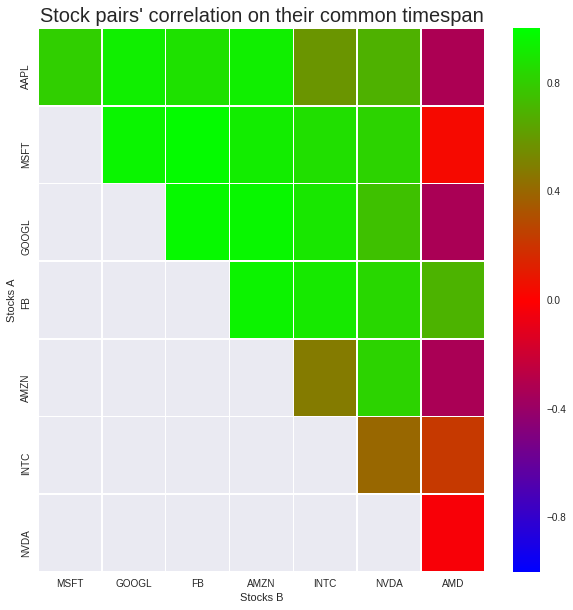

In [22]:
# Drawing a Seaborn heatmap for the correlations
f, ax = plt.subplots(figsize=(10, 10))
plt.title("Stock pairs' correlation on their common timespan", fontsize=20)
ax = sns.heatmap(df, linewidths=.5, ax=ax, cmap='brg', vmin=-1.0, vmax=1.0)

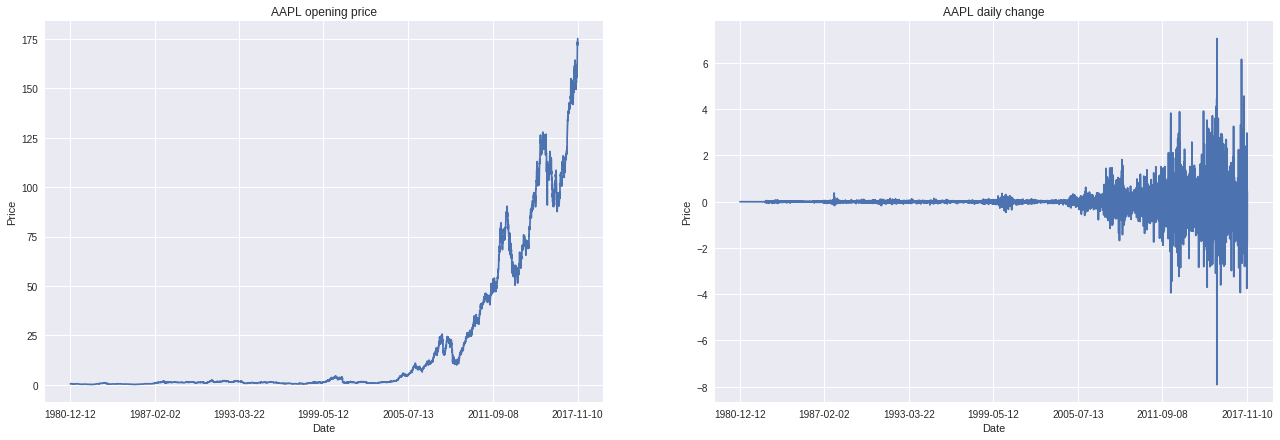

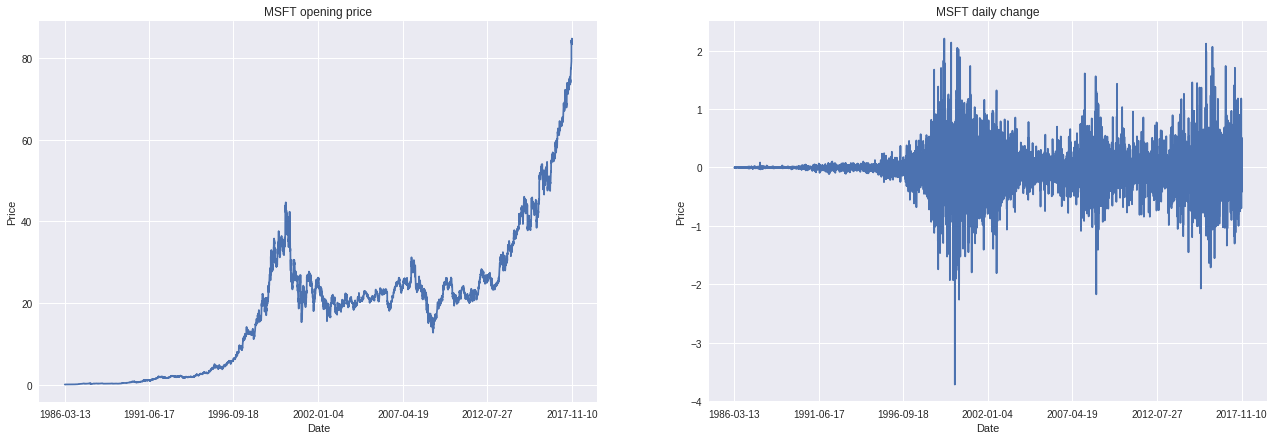

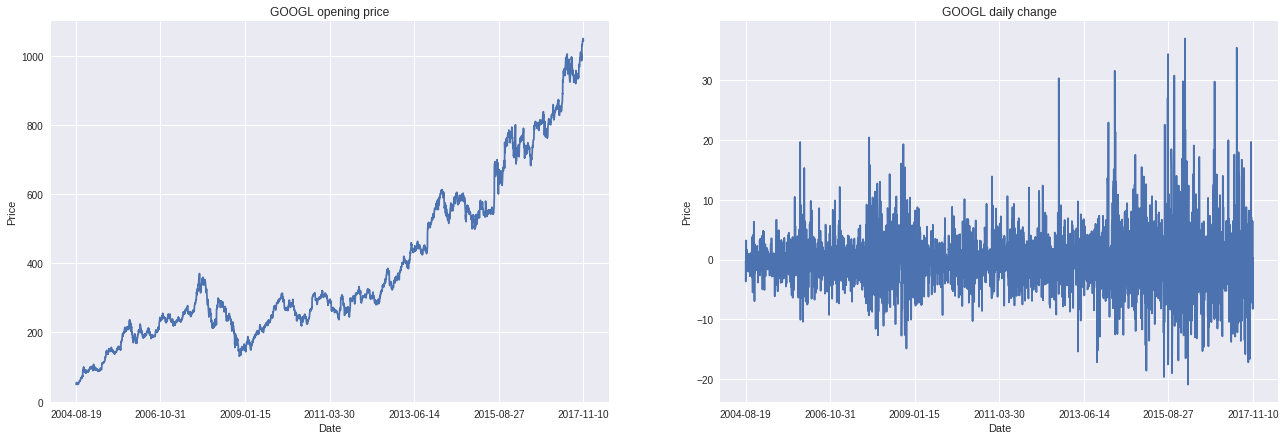

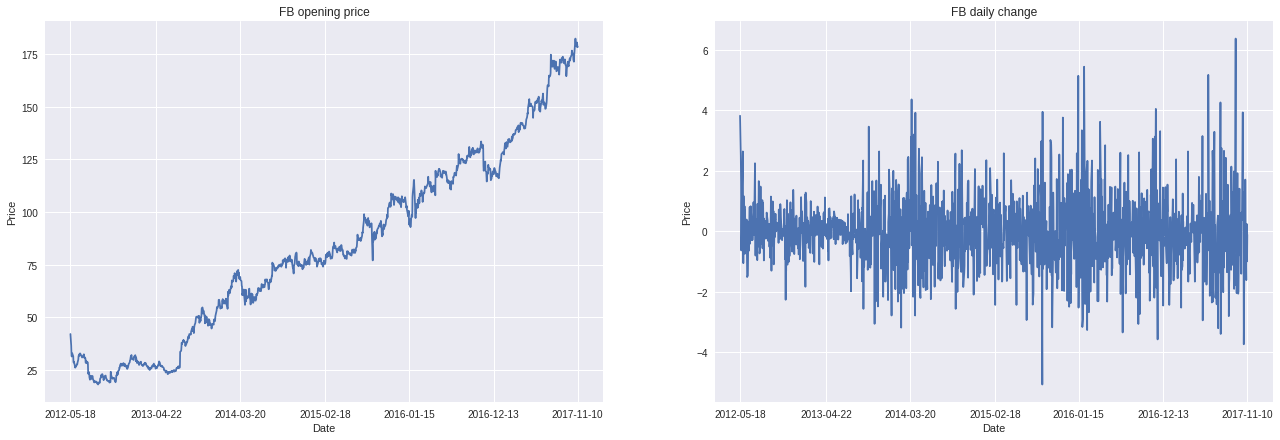

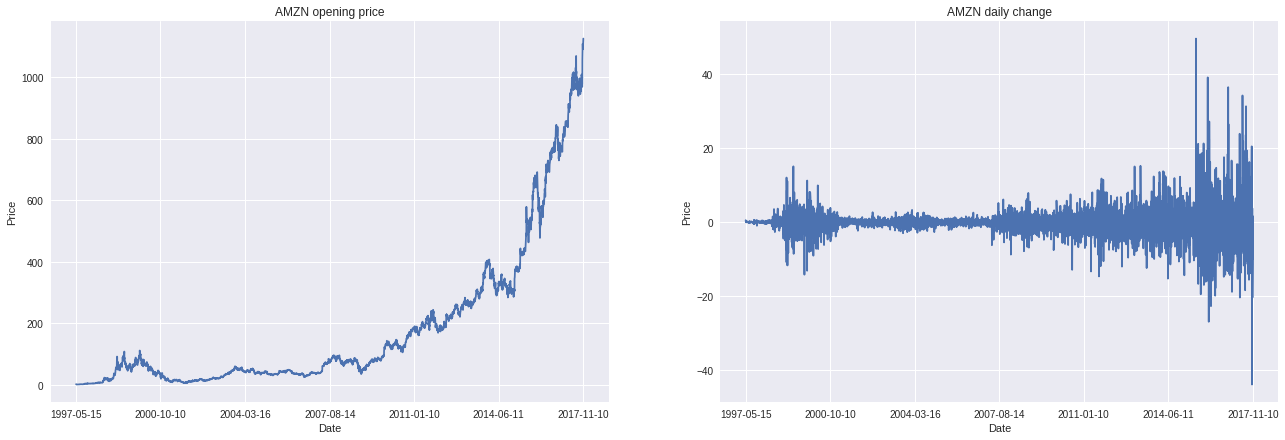

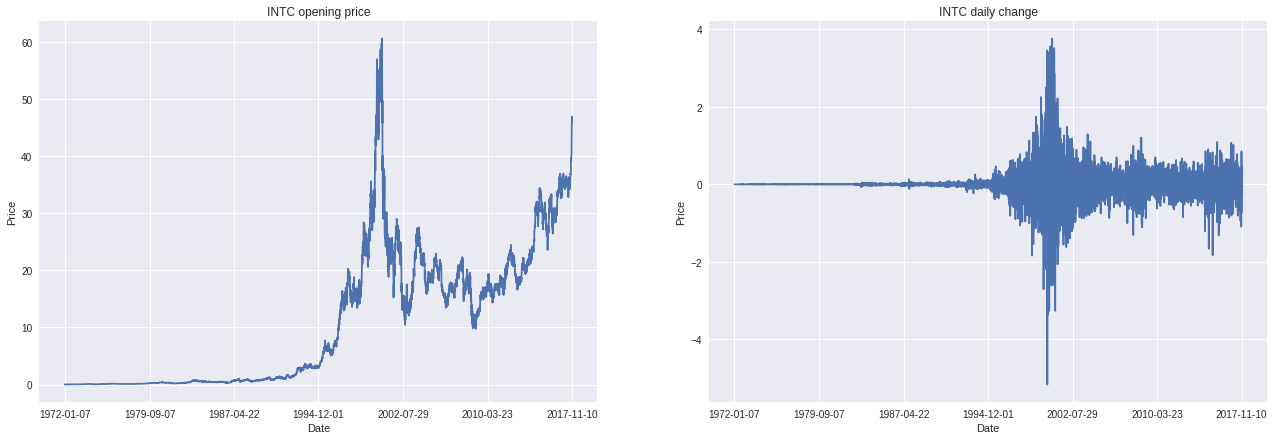

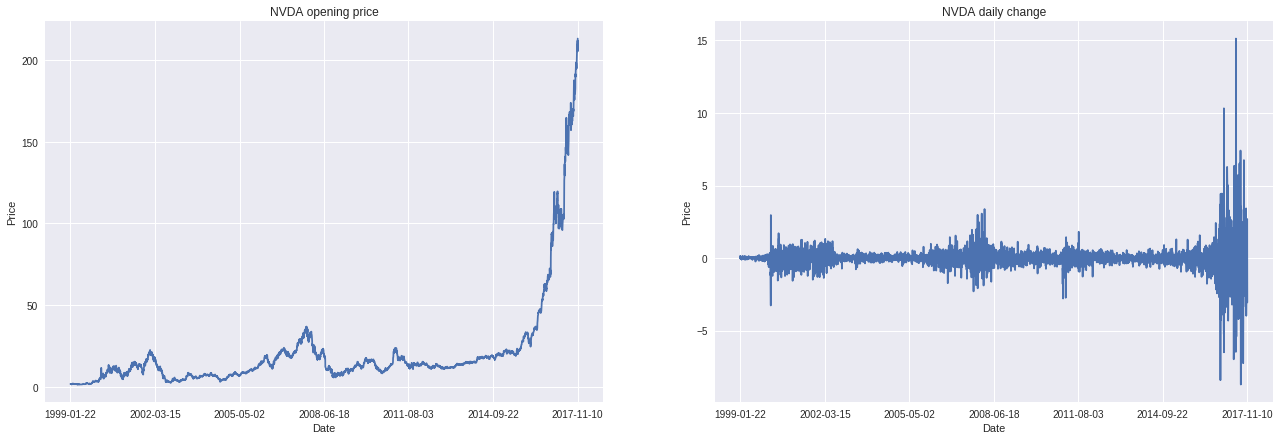

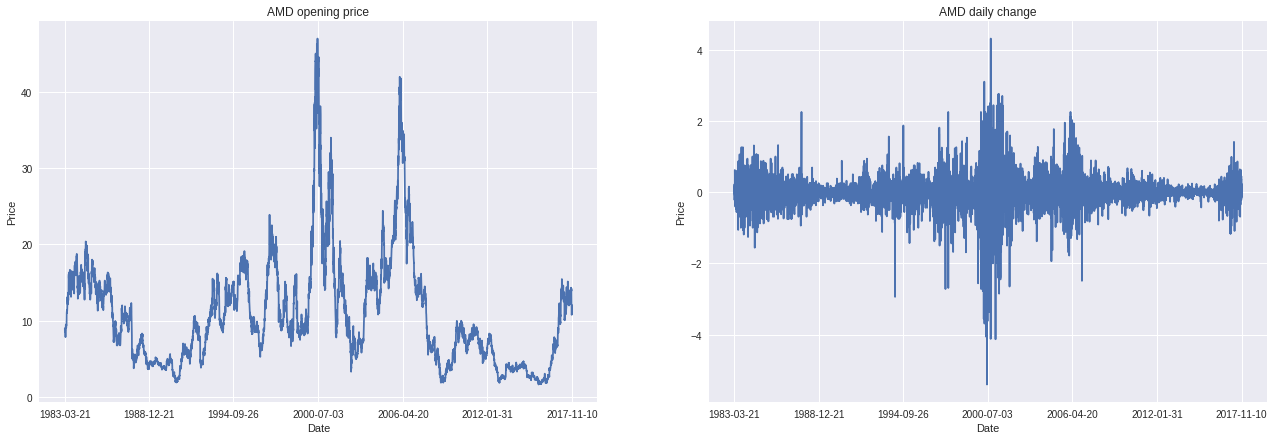

In [23]:
# Drawing diagrams of the opening prices and the price changes of 
# the stocks by companies
title = [' opening price', ' daily change']

for key in stock_dict.keys():
  x = stock_dict[key]['Timestamp']
  y = [
      stock_dict[key]['Open'], 
      stock_dict[key]['Open'] - stock_dict[key]['Close']
  ]
  
  timestamp, date_string = convert_to_ticks(x.values, n=6)

  fig, ax = plt.subplots(1, 2, figsize=(22, 7))
  for i in range(2):
    ax[i].plot(x, y[i])
    ax[i].set_xticks(timestamp)
    ax[i].set_xticklabels(date_string)
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Price')
    ax[i].set_title(key + title[i])
  
  plt.show()

# Data preprocessing

> Finally we can normalize our data, and split it into train, validation and test datasets

In [0]:
# Scalers to transform values into [0, 1] interval and inverse transform back to normal values
scalers = {}

In [0]:
# Normalizing datasets
for k, df in stock_dict.items():
  scaler = MinMaxScaler()
  df[['Open', 'High', 'Low', 'Close', 'Volume']] = \
    scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])
  scalers[k] = scaler

In [0]:
# Selecting timespans where we have data from all companies
start_at = []
for k, df in stock_dict.items():
  start_at.append(df.values[0, 0])
  
for k, df in stock_dict.items():
  df = df.loc[df['Timestamp'] >= max(start_at)]
  df = df.reset_index(drop=True)
  stock_dict[k] = df

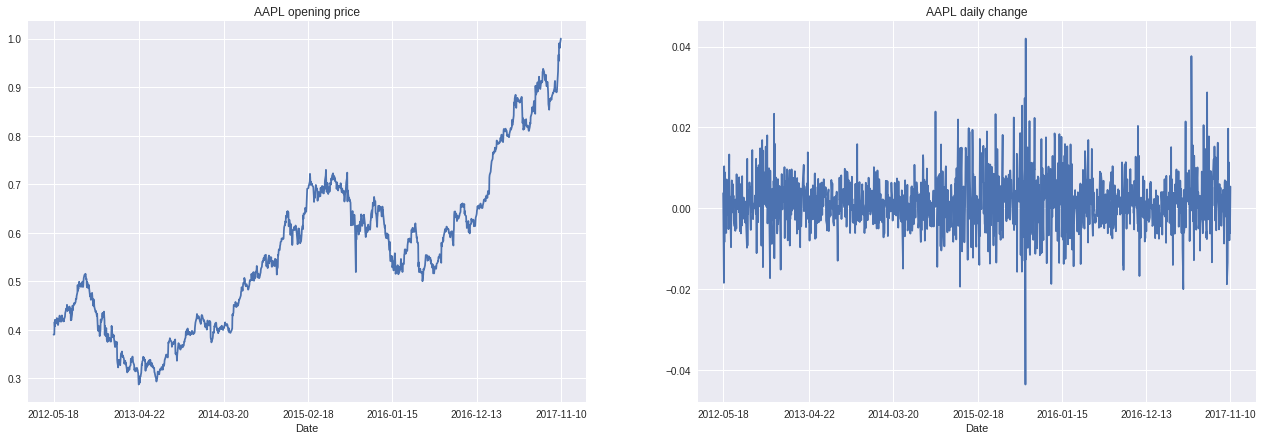

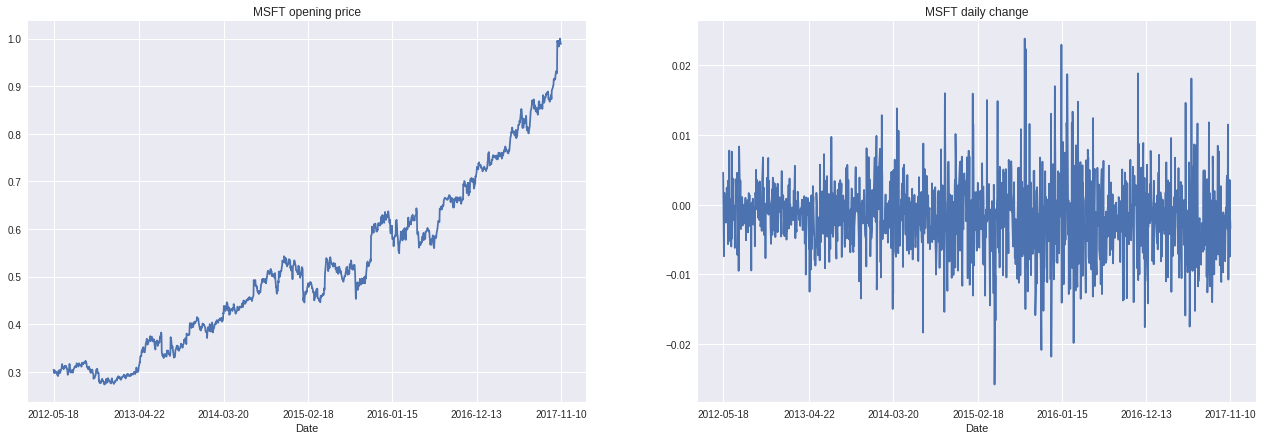

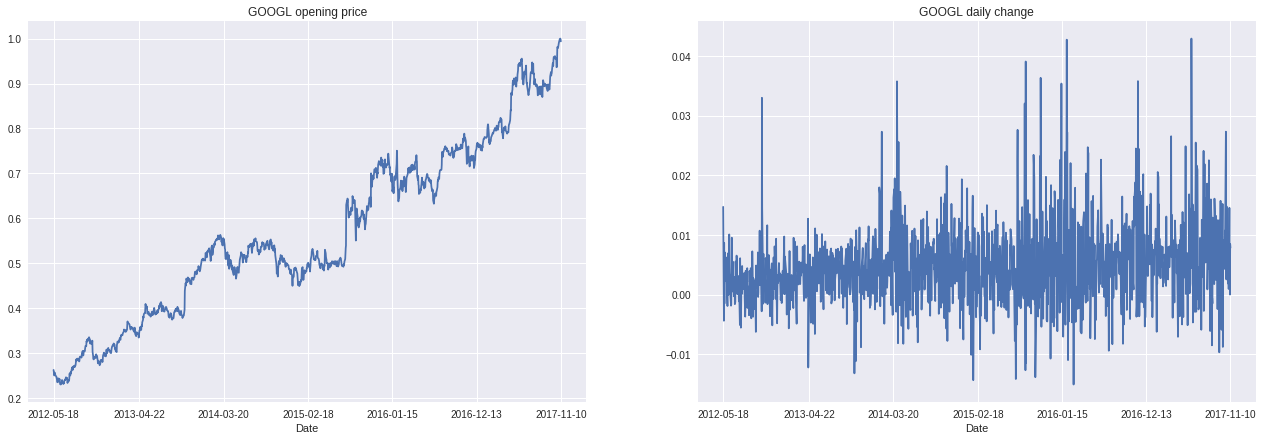

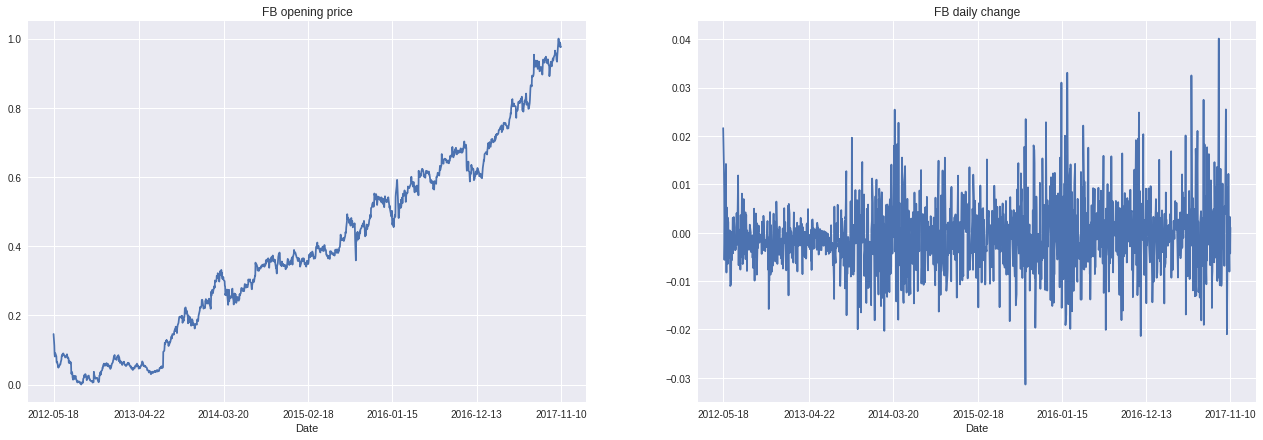

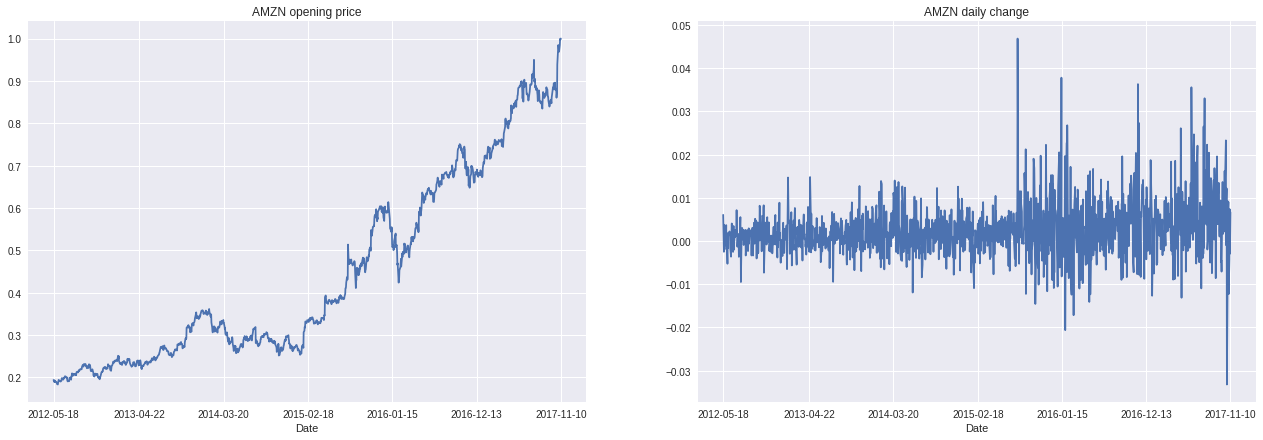

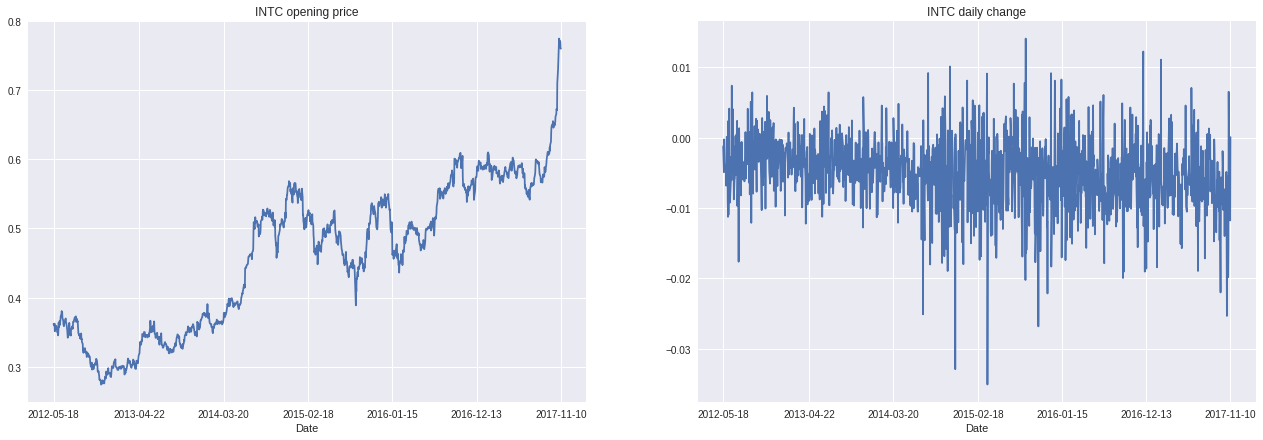

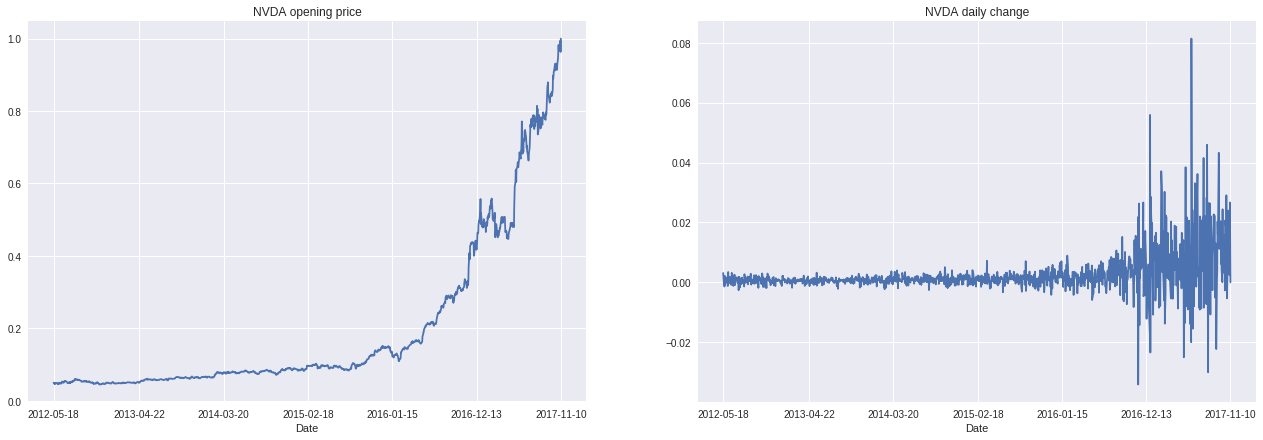

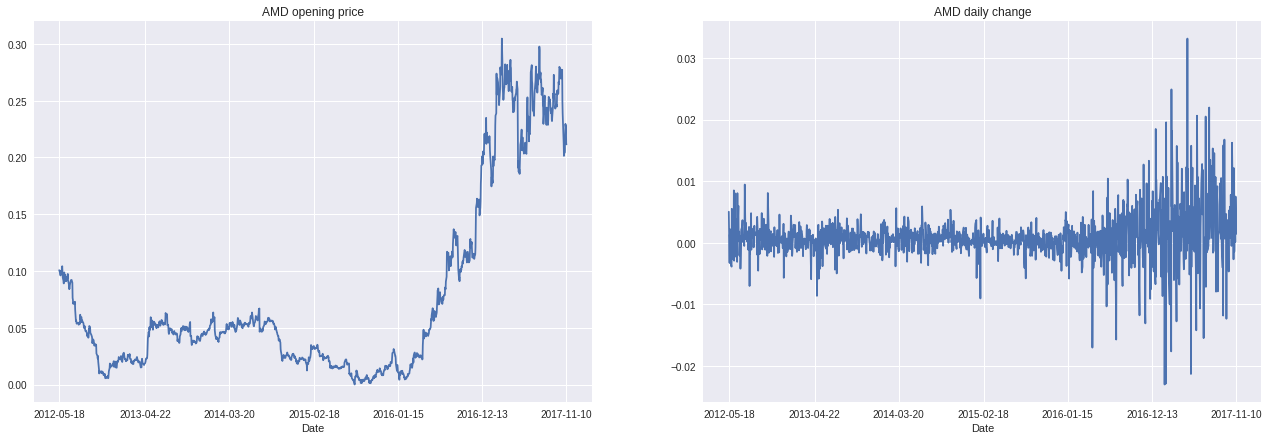

In [27]:
# Visualize common timespan (scaled values)
title = [' opening price', ' daily change']

for key in stock_dict.keys():
  x = stock_dict[key]['Timestamp']
  y = [
      stock_dict[key]['Open'], 
      stock_dict[key]['Open'] - stock_dict[key]['Close']
  ]
  
  timestamp, date_string = convert_to_ticks(x.values, n=6)

  fig, ax = plt.subplots(1, 2, figsize=(22, 7))
  for i in range(2):
    ax[i].plot(x, y[i])
    ax[i].set_xticks(timestamp)
    ax[i].set_xticklabels(date_string)
    ax[i].set_xlabel('Date')
    ax[i].set_title(key + title[i])
  
  plt.show()

In [0]:
# Calculate Pearson correlation coefficients
stock_correlations = {}
list_of_names = list(stock_dict.keys())

for i1 in range(len(list_of_names)):
  for i2 in range(i1+1, len(list_of_names)):
    # We iterate through the companies in a way that all pairings only happen once
    key1 = list_of_names[i1]
    key2 = list_of_names[i2]
    dataframe1 = stock_dict[key1]
    dataframe2 = stock_dict[key2]
    # We calculate the time frame intersection between the data of the two companies
    ins = set(dataframe1.values[:, 0]).intersection(set(dataframe2.values[:, 0]))
    df1_kozos = dataframe1.loc[dataframe1['Timestamp'].isin(ins)]
    df2_kozos = dataframe2.loc[dataframe2['Timestamp'].isin(ins)]
    # We calculate and store the calculated results
    tmp = pearsonr(df1_kozos.values[:, 1], df2_kozos.values[:, 1])
    stock_correlations[(key1, key2)] = [tmp[0], tmp[1]]

In [0]:
# Preparing correlation data for seaborn heatmap
stock_table = np.full(shape=(8, 8), fill_value=np.NaN)
for i1 in range(len(list_of_names)):
  for i2 in range(i1+1, len(list_of_names)):
    key1 = list_of_names[i1]
    key2 = list_of_names[i2]
    stock_table[i1, i2] = stock_correlations[(key1, key2)][0]
# Create pandas dataframe from the correlation 2D array
df = pd.DataFrame(stock_table, index=list_of_names, columns=list_of_names)
# Seaborn heatmap requires the axes to be named
df = df.rename_axis('Stocks A')
df = df.rename_axis('Stocks B', axis="columns")
# First columns contains only NaN, so we can drop it
df = df.drop(df.columns[0], axis=1)
# Last row contains only NaN, so we can drop it
df = df.drop(df.index[len(df)-1])

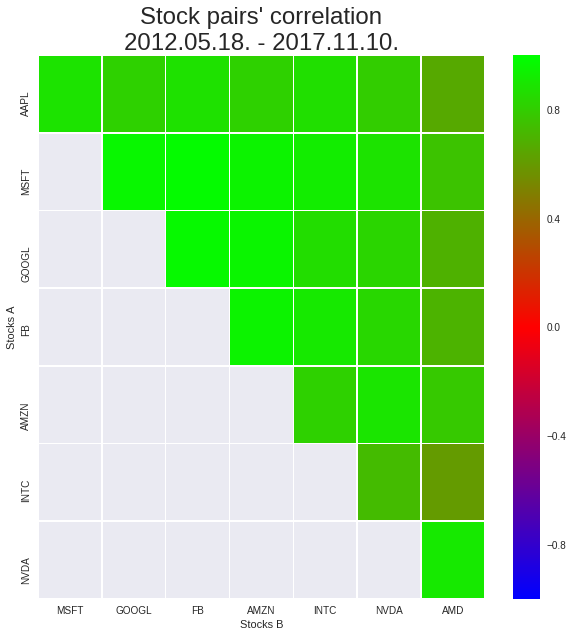

In [30]:
# Drawing a Seaborn heatmap for the correlations
f, ax = plt.subplots(figsize=(10, 10))
plt.title("Stock pairs' correlation\n2012.05.18. - 2017.11.10.", fontsize=24)
ax = sns.heatmap(df, linewidths=.5, ax=ax, cmap='brg', vmin=-1.0, vmax=1.0)

In [31]:
# Train-Valid_Test split
valid_split = 0.7
test_split = 0.85

train, valid, test = {}, {}, {}

for k, df in stock_dict.items():
  vals = df.values
  vs = int(len(vals) * valid_split)
  ts = int(len(vals) * test_split)
  train[k] = vals[:vs]
  valid[k] = vals[vs:ts]
  test[k] = vals[ts:]
  print(k)
  print('\ttrain length:', len(train[k]))
  print('\tvalid length:', len(valid[k]))
  print('\ttest  length:', len(test[k]))

AAPL
	train length: 966
	valid length: 207
	test  length: 208
MSFT
	train length: 966
	valid length: 207
	test  length: 208
GOOGL
	train length: 966
	valid length: 207
	test  length: 208
FB
	train length: 966
	valid length: 207
	test  length: 208
AMZN
	train length: 966
	valid length: 207
	test  length: 208
INTC
	train length: 966
	valid length: 207
	test  length: 208
NVDA
	train length: 966
	valid length: 207
	test  length: 208
AMD
	train length: 966
	valid length: 207
	test  length: 208


# Plans

* news headlines clustering (network)

* connect clusters to stock price change (network)

* train predictor on prices and news

# References

---
---

[Univariate feature selection](http://blog.datadive.net/selecting-good-features-part-i-univariate-selection/)

---

[Huge Stock Market Dataset](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs)

[Google, Amazon, Facebook, Aapple stock prices](https://www.kaggle.com/stexo92/gafa-stock-prices)

[New York Stock Exchange Database](https://www.kaggle.com/dgawlik/nyse)

---

### Planned

---

[Attention learning](https://blog.heuritech.com/2016/01/20/attention-mechanism/)